# Satellite Image Classification using CNN

### There will be four types of images named cloudy, desert,green,water.

### Import Required Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [2]:
from sklearn.utils import shuffle
from skimage.transform import resize
from tensorflow.keras import Sequential,layers
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Fetch the dataset


In [3]:
cloudy=glob('cloudy/*.jpg')[0:500]
desert=glob('desert/*.jpg')[0:500]
green=glob('green_area/*.jpg')[0:500]
water=glob('water/*.jpg')[0:500]

### Define classes and labels



In [4]:
dic={0:'cloudy',1:'desert',2:'green_area',3:'water'}

In [5]:
len(cloudy)

500

### load and label images for each category

In [6]:
labels=[]
images=[]

for i in cloudy:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)
    

for i in desert:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

for i in green:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)

for i in water:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)

### Plot some of these images

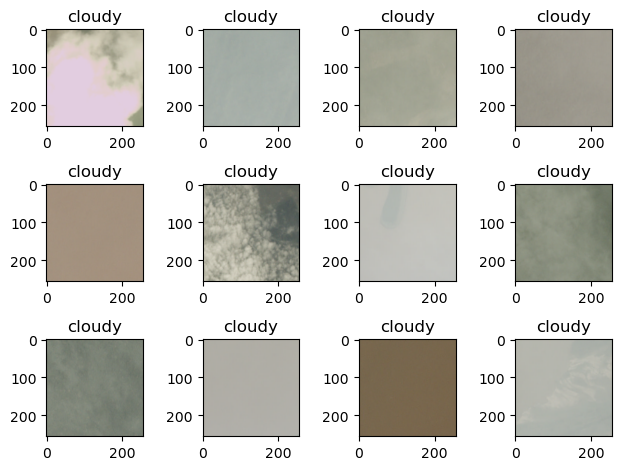

In [7]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### Shuffle the images

In [8]:
images,labels=shuffle(images,labels)

### Plot the shuffled images

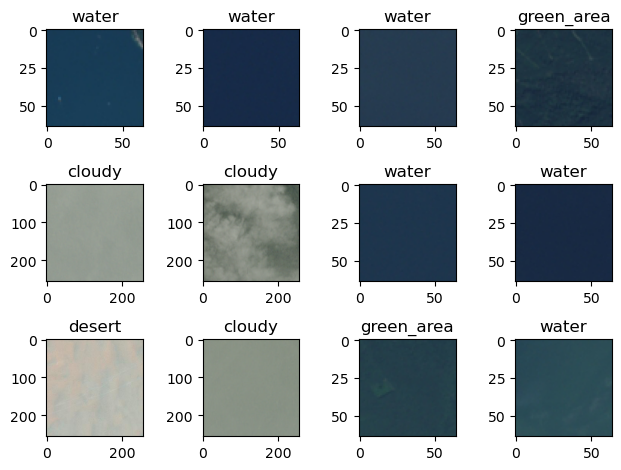

In [9]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### Resize the images

In [10]:
X=[]

for i in images:
    X.append(resize(i,(224,224,3)))

### Plot the resized images

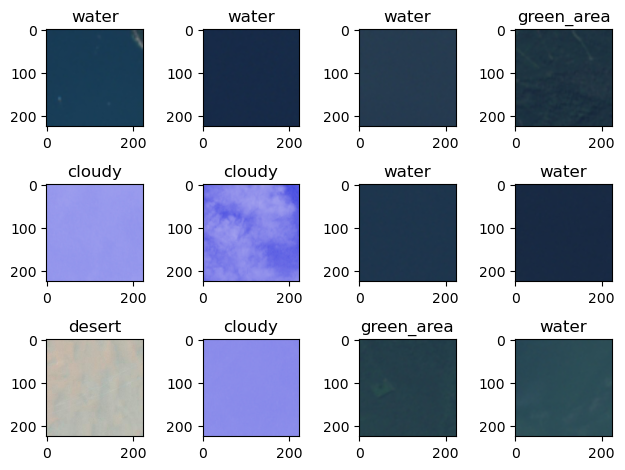

In [11]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i])
    plt.title(dic[labels[i]])
plt.tight_layout()

### Convert into array

In [12]:
X=np.array(X)
y=np.array(labels)

### split the data

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### Build the model

In [14]:
model=Sequential([
    layers.Conv2D(12,(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPool2D(),
    
    layers.Conv2D(12,(3,3),activation='relu'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(4,activation='softmax')
])

C:\Users\shrid\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Compile the model

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train the model

In [16]:
y_train.shape

(1600,)

In [17]:
X_train.shape

(1600, 224, 224, 3)

In [18]:
model.fit(X_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 44s 204ms/step - accuracy: 0.6042 - loss: 0.7488 - val_accuracy: 0.9000 - val_loss: 0.3028
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.8853 - loss: 0.2810 - val_accuracy: 0.9000 - val_loss: 0.2316
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9005 - loss: 0.2588 - val_accuracy: 0.9250 - val_loss: 0.2123
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8669 - loss: 0.2923 - val_accuracy: 0.9125 - val_loss: 0.2431
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.8992 - loss: 0.2240 - val_accuracy: 0.9375 - val_loss: 0.1658
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9216 - loss: 0.1974 - val_accuracy: 0.9375 - val_loss: 0.1532
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9029 - loss: 0.2370 - val_accuracy: 0.9375 - val_loss: 0.1372
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9030 - loss: 0.2267 - val_accuracy: 0

### Model prediction

In [19]:
y_pred=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [20]:
y_pred=[np.argmax(i) for i in y_pred]

### Accuracy score

In [21]:
metrics.accuracy_score(y_test,y_pred)

0.8825

### Confusion matrix

<Axes: >

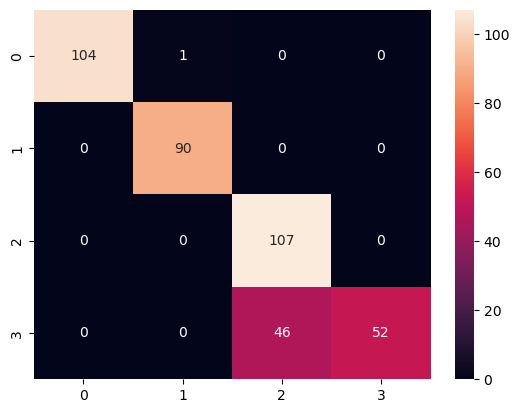

In [22]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Classification report

In [23]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       0.99      1.00      0.99        90
           2       0.70      1.00      0.82       107
           3       1.00      0.53      0.69        98

    accuracy                           0.88       400
   macro avg       0.92      0.88      0.88       400
weighted avg       0.92      0.88      0.88       400



***